# Table of Contents
 <p><div class="lev1 toc-item"><a href="#DATA:" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA:</a></div><div class="lev1 toc-item"><a href="#exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Discuss your findings</a></div>

**regression exercise**

**written by Federica B Bianco CUSP 2017**

**for PUI lecture on models and linear regression**

**investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

In [2]:
from __future__ import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline
import os

#plus importing scipy.stats
import scipy.stats as st
import statsmodels.formula.api as smf
import statsmodels.api as sm
np.random.seed(10)

import seaborn  as sns

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


### Download data and format into dataframes

In [3]:
# Download data into current file
!wget -O - 'https://raw.githubusercontent.com/andrewnell/PUI2017_adn323/master/HW5_adn323/API_SP.POP.TOTL_DS2_en_csv_v2.csv' > 'global_population.csv'
!wget -O - 'https://raw.githubusercontent.com/andrewnell/PUI2017_adn323/master/HW5_adn323/API_NY.GDP.MKTP.CD_DS2_en_csv_v2.csv' > 'global_GDP.csv'
!wget -O - 'https://raw.githubusercontent.com/andrewnell/PUI2017_adn323/master/HW5_adn323/data-pvLFI.csv' > 'MassShooting_Stats.csv'
!wget -O - 'https://raw.githubusercontent.com/andrewnell/PUI2017_adn323/master/HW5_adn323/World%20firearms%20murders%20and%20ownership%20-%20Sheet%201.csv' > 'Gun_Stats.csv'

--2017-10-18 21:22:10--  https://raw.githubusercontent.com/andrewnell/PUI2017_adn323/master/HW5_adn323/API_SP.POP.TOTL_DS2_en_csv_v2.csv
Resolving raw.githubusercontent.com... 151.101.20.133
Connecting to raw.githubusercontent.com|151.101.20.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170351 (166K) [text/plain]
Saving to: “STDOUT”

100%[======================================>] 170,351     --.-K/s   in 0.008s  

2017-10-18 21:22:10 (19.2 MB/s) - written to stdout [170351/170351]

--2017-10-18 21:22:10--  https://raw.githubusercontent.com/andrewnell/PUI2017_adn323/master/HW5_adn323/API_NY.GDP.MKTP.CD_DS2_en_csv_v2.csv
Resolving raw.githubusercontent.com... 151.101.20.133
Connecting to raw.githubusercontent.com|151.101.20.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 238848 (233K) [text/plain]
Saving to: “STDOUT”

100%[======================================>] 238,848     --.-K/s   in 0.01s   

2017-10-18 21:22:10 (20.3 MB/s

In [4]:
###############################################################################
MassShootingdf = pd.read_csv("MassShooting_Stats.csv")
Gunsdf = pd.read_csv("Gun_Stats.csv")
Popdf = pd.read_csv("global_population.csv",skiprows=3)
GDPdf = pd.read_csv("global_GDP.csv",skiprows=3)
###############################################################################

### Check and clean data

In [5]:
###############################################################################
Gunsdf.drop(['ISO code', 'Source','% of homicides by firearm',
             'Homicide by firearm rate per 100,000 pop',
             'Rank by rate of ownership', 
             'Average firearms per 100 people'],
            axis=1,inplace=True)
Gunsdf.head()
###############################################################################

,Country/Territory,Number of homicides by firearm,Average total all civilian firearms
0,Albania,56.0,270000.0
1,Algeria,20.0,1900000.0
2,Angola,NaN,2800000.0
3,Anguilla,1.0,NaN
4,Argentina,1198.0,3950000.0


In [6]:
###############################################################################
Popdf.drop(['Unnamed: 61','Country Code', 'Indicator Name', 'Indicator Code',
            '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967',
            '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
            '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
            '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
            '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
            '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
            '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'],
           axis=1,inplace=True)
Popdf.rename(columns={'2016':'pop'}, inplace=True)
Popdf.head()
###############################################################################

,Country Name,pop
0,Aruba,104822.0
1,Afghanistan,34656032.0
2,Angola,28813463.0
3,Albania,2876101.0
4,Andorra,77281.0


In [7]:
###############################################################################
GDPdf.drop(['Unnamed: 61','Country Code', 'Indicator Name', 'Indicator Code',
            '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967',
            '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
            '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
            '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
            '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
            '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
            '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'],
           axis=1,inplace=True)
GDPdf.rename(columns={'2016':'gdp'}, inplace=True)
GDPdf['gdp'].replace('nan',np.nan,inplace=True)
GDPdf.dropna(axis=0, inplace=True)
GDPdf.head()
###############################################################################

,Country Name,gdp
1,Afghanistan,1.946902e+10
2,Angola,8.963316e+10
3,Albania,1.192689e+10
5,Arab World,2.500932e+12
6,United Arab Emirates,3.487433e+11


In [8]:
# Merge GDP and Population data frames
GDPpopdf = Popdf.merge(GDPdf, on="Country Name")
GDPpopdf.head()

,Country Name,pop,gdp
0,Afghanistan,34656032.0,1.946902e+10
1,Angola,28813463.0,8.963316e+10
2,Albania,2876101.0,1.192689e+10
3,Arab World,406452690.0,2.500932e+12
4,United Arab Emirates,9269612.0,3.487433e+11


### Merge Data Sets

In [9]:
# Merge Dataframes and visualise
df = GDPpopdf.merge(Gunsdf, left_on="Country Name", right_on="Country/Territory")
df = df.merge(MassShootingdf, left_on="Country Name", right_on="Country")
df.head()

,Country Name,pop,gdp,Country/Territory,Number of homicides by firearm,Average total all civilian firearms,Country,Guns/100 inhabitants,Number of mass shootings
0,Australia,24127159.0,1.204616e+12,Australia,30.0,3050000.0,Australia,15.0,4
1,Austria,8747358.0,3.864278e+11,Austria,18.0,2500000.0,Austria,30.4,1
2,Canada,36286425.0,1.529760e+12,Canada,173.0,9950000.0,Canada,30.8,4
3,Switzerland,8372098.0,6.598272e+11,Switzerland,57.0,3400000.0,Switzerland,45.7,2
4,Germany,82667685.0,3.466757e+12,Germany,158.0,25000000.0,Germany,30.3,7


In [10]:
# Convert Number of shootings to float
df['Number of mass shootings'] = df['Number of mass shootings'].astype(float)
df.head(24)

,Country Name,pop,gdp,Country/Territory,Number of homicides by firearm,Average total all civilian firearms,Country,Guns/100 inhabitants,Number of mass shootings
0,Australia,24127159.0,1.204616e+12,Australia,30.0,3050000.0,Australia,15.0,4.0
1,Austria,8747358.0,3.864278e+11,Austria,18.0,2500000.0,Austria,30.4,1.0
2,Canada,36286425.0,1.529760e+12,Canada,173.0,9950000.0,Canada,30.8,4.0
3,Switzerland,8372098.0,6.598272e+11,Switzerland,57.0,3400000.0,Switzerland,45.7,2.0
4,Germany,82667685.0,3.466757e+12,Germany,158.0,25000000.0,Germany,30.3,7.0
5,Denmark,5731118.0,3.061429e+11,Denmark,15.0,650000.0,Denmark,12.0,0.0
6,Spain,46443959.0,1.232088e+12,Spain,90.0,4500000.0,Spain,10.4,1.0
7,Finland,5495096.0,2.367850e+11,Finland,24.0,2400000.0,Finland,45.3,2.0
8,France,66896109.0,2.465454e+12,France,35.0,19000000.0,France,31.2,6.0
9,Greece,10746740.0,1.945587e+11,Greece,29.0,2500000.0,Greece,22.5,0.0


# exploration

## plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


In [11]:
# Add columns to the data frame with data per person
df["mass shootings per person"] = df['Number of mass shootings']/df['pop']
df["gdp per person"] = df['gdp']/df['pop']

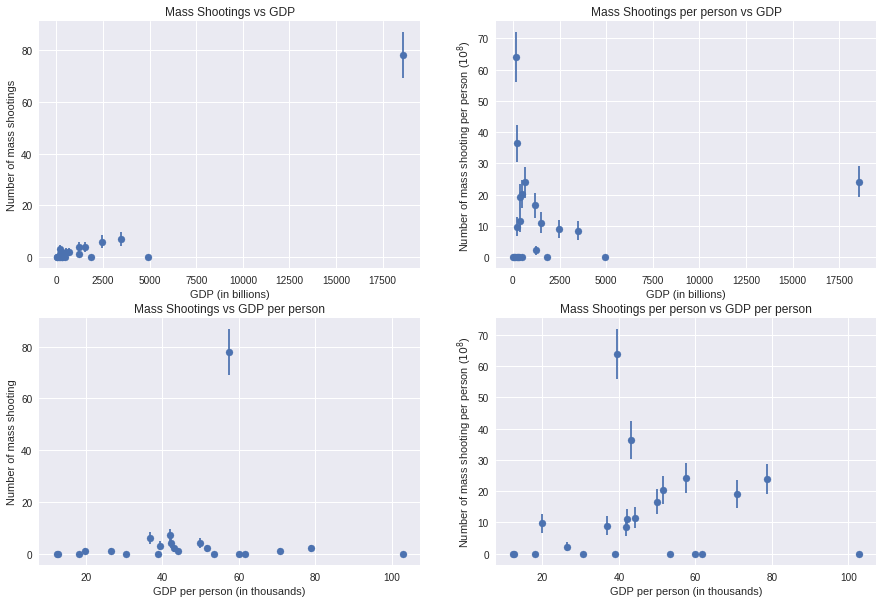

In [12]:
# Set up plots with grid
fig = pl.figure(figsize=(15,10)) 
grid = pl.GridSpec(2,2)
ax0 = pl.subplot(grid[0,0])
ax1 = pl.subplot(grid[0,1])
ax2 = pl.subplot(grid[1,0])
ax3 = pl.subplot(grid[1,1])


# Plot absolute values
scatter = ax0.scatter(df.gdp / 1e9, df['Number of mass shootings'])
ax0.errorbar(df.gdp / 1e9, df['Number of mass shootings'], 
             yerr = np.sqrt(df['Number of mass shootings'] * 1.0), fmt = '.')
# Format figure
ax0.set_xlabel("GDP (in billions)")
ax0.set_ylabel("Number of mass shootings")
ax0.set_ylim()
ax0.set_title("Mass Shootings vs GDP")

# Plot mass shootings per person vs absolute GDP
scatter = ax1.scatter(df["gdp"]/ 1e9, df['mass shootings per person']* 1e8)
ax1.errorbar(df["gdp"]/ 1e9, df['mass shootings per person']* 1e8, 
             yerr = np.sqrt((df['mass shootings per person']* 1e8) * 1.0), fmt = '.')

# Format figure
ax1.set_xlabel("GDP (in billions)")
ax1.set_ylabel("Number of mass shooting per person ($10^8$)")
ax1.set_ylim()
ax1.set_xlim()
ax1.set_title("Mass Shootings per person vs GDP")

# Plot mass shootings absolute vs GDP per person
scatter = ax2.scatter(df["gdp per person"]/ 1e3, df['Number of mass shootings'])
ax2.errorbar(df["gdp per person"]/ 1e3, df['Number of mass shootings'], 
             yerr = np.sqrt((df['Number of mass shootings']) * 1.0), fmt = '.')

# Format figure
ax2.set_xlabel("GDP per person (in thousands)")
ax2.set_ylabel("Number of mass shooting")
ax2.set_ylim()
ax2.set_xlim()
ax2.set_title("Mass Shootings vs GDP per person")

# Plot mass shootings per person vs GDP per person
scatter = ax3.scatter(df["gdp per person"]/ 1e3, df['mass shootings per person']* 1e8)
ax3.errorbar(df["gdp per person"]/ 1e3, df['mass shootings per person']* 1e8, 
             yerr = np.sqrt((df['mass shootings per person']* 1e8) * 1.0), fmt = '.')

# Format figure
ax3.set_xlabel("GDP per person (in thousands)")
ax3.set_ylabel("Number of mass shooting per person ($10^8$)")
ax3.set_ylim()
ax3.set_xlim()
ax3.set_title("Mass Shootings per person vs GDP per person")


### Figure 1: Plots of Mass Shootings vs GDP, error reperesents Poisson statistics
#### Note that when plotted as absolute values there is a strong outlier in the US in terms of GDP and mass shootings, 
#### However, when plotted per person the outliers are New Zealnd in terms of shootings per person and luxembourg in terms of GDP per person. There is appears to be some direct correlation, however there are several data points that have zero mass shootings. There could be a debate about whether the zeroes are the outliers or the other data points.
#### It should also be noted that the larger the Number of mass shootings, the larger the error

## plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

In [13]:
# Create new column for Average firearms per Person
df["AvgGunsPerPerson"] = df["Average total all civilian firearms"] / df['pop']

<Container object of 3 artists>

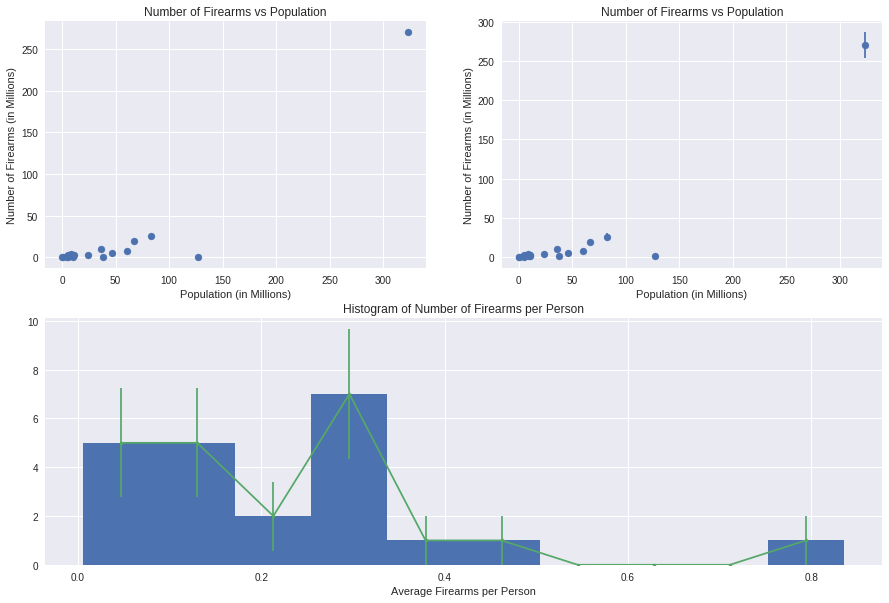

In [14]:
# Set up plots with grid
fig = pl.figure(figsize=(15,10)) 
grid = pl.GridSpec(2,2)
ax0 = pl.subplot(grid[0,0])
ax1 = pl.subplot(grid[0,1])
ax2 = pl.subplot(grid[1,:])

# Plot absolute values
scatter = ax0.scatter(df["pop"]/1e6, df['Average total all civilian firearms']/1e6)

# Format figure
ax0.set_xlabel("Population (in Millions)")
ax0.set_ylabel("Number of Firearms (in Millions)")
ax0.set_ylim()
ax0.set_title("Number of Firearms vs Population")

# Plot absolute values 
scatter = ax1.scatter(df["pop"]/ 1e6, df['Average total all civilian firearms']/ 1e6)
ax1.errorbar(df["pop"]/ 1e6, df['Average total all civilian firearms']/ 1e6, 
             yerr = np.sqrt(df['Average total all civilian firearms']/1e6 * 1.0), fmt = '.')
# Format figure
ax1.set_xlabel("Population (in Millions)")
ax1.set_ylabel("Number of Firearms (in Millions)")
ax1.set_ylim()
ax1.set_xlim()
ax1.set_title("Number of Firearms vs Population")

# Plot Histogram
ax2.hist(df["AvgGunsPerPerson"], bins=10)
ax2.set_xlabel('Average Firearms per Person')
ax2.set_title("Histogram of Number of Firearms per Person")
#ax2.set_xticks(np.arange(0,0.9,0.1));

# Cde gotten from https://stackoverflow.com/questions/
# 11774822/matplotlib-histogram-with-errorbars
y, bin_edges = numpy.histogram(df['AvgGunsPerPerson'], bins=10)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
plt.errorbar(bin_centers,y,yerr = y**0.5,marker = '.')

### Figure 2: Plots of Number of Firearms vs Population
#### Note the US is the outlier again with a disproportionate number of guns, however the remainder of the countries do follow a direct correaltion. However, there are several data points that deviate from this and have no guns.

#### It can be seen that the larger the value the larger the error

## plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

In [15]:
# Create new column for Number of homicides by firearms per Person
df["AvgDeathsPerPerson"] = df["Number of homicides by firearm"] / df['pop']

<Container object of 3 artists>

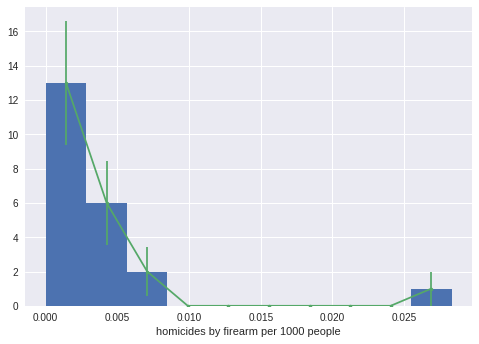

In [16]:
fig, ax = plt.subplots()
ax.hist(df['AvgDeathsPerPerson'] * 1000, bins=10)
ax.set_xlabel('homicides by firearm per 1000 people');

# Cde gotten from https://stackoverflow.com/questions/
# 11774822/matplotlib-histogram-with-errorbars
y, bin_edges = numpy.histogram(df['AvgDeathsPerPerson'] * 1000, bins=10)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
plt.errorbar(bin_centers,y,yerr = y**0.5,marker = '.')

### Figure 3: Histrogram of homicides by Firearm per 1000 people
#### Again USA is a clear outlier

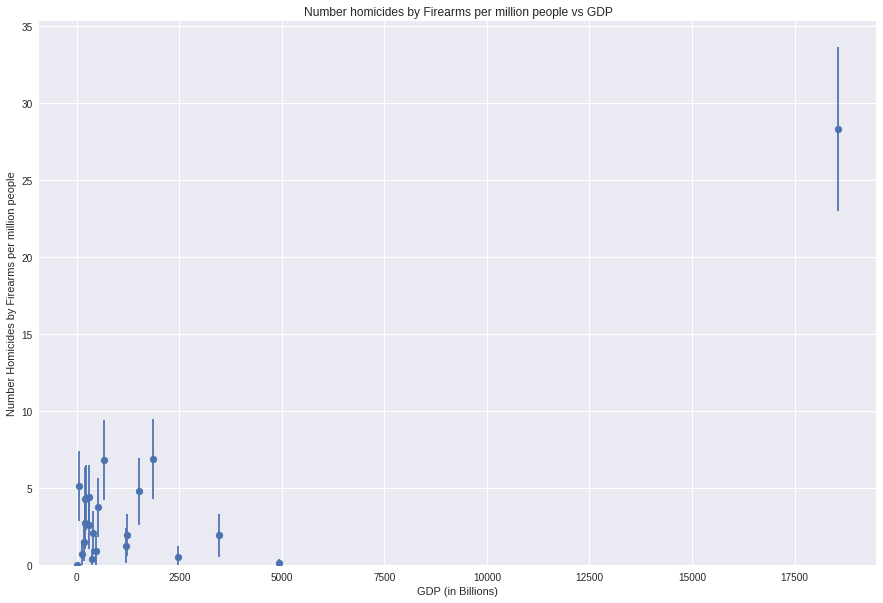

In [17]:
# Set up plots with grid
fig = pl.figure(figsize=(15,10)) 
ax0 = pl.subplot()

# Plot absolute values
scatter = ax0.scatter(df["gdp"]/1e9, df["AvgDeathsPerPerson"]*1e6)
ax0.errorbar(df["gdp"]/ 1e9, df['AvgDeathsPerPerson']* 1e6, 
             yerr = np.sqrt(df['AvgDeathsPerPerson']*1e6 * 1.0), fmt = '.')

# Format figure
ax0.set_xlabel("GDP (in Billions)")
ax0.set_ylabel("Number Homicides by Firearms per million people")
ax0.set_ylim(0)
ax0.set_title("Number homicides by Firearms per million people vs GDP")

### Figure 4: Number of Homicides by firearms per million people
#### Note how the error increases with increasing Homicides, the US is again an outlier with some zero values as outliers as well. There is no clear visual correlation between the data

## plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars


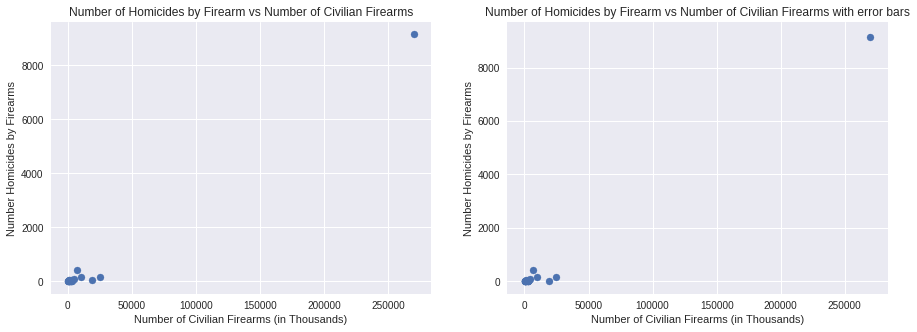

In [18]:
# Set up plots with grid
fig = pl.figure(figsize=(15,5)) 
grid = pl.GridSpec(1,2)
ax0 = pl.subplot(grid[0,0])
ax1 = pl.subplot(grid[0,1])

# Plot absolute values
scatter = ax0.scatter(df["Average total all civilian firearms"]/1e3, df['Number of homicides by firearm'])

# Format figure
ax0.set_xlabel("Number of Civilian Firearms (in Thousands)")
ax0.set_ylabel("Number Homicides by Firearms")
ax0.set_ylim()
ax0.set_title("Number of Homicides by Firearm vs Number of Civilian Firearms")

# Plot absolute values 
scatter = ax1.scatter(df["Average total all civilian firearms"]/1e3, df['Number of homicides by firearm'])
ax1.errorbar(df["Average total all civilian firearms"]/1e3, df['Number of homicides by firearm'], 
             yerr = np.sqrt(df['Number of homicides by firearm'] * 1.0), fmt = '.')
# Format figure
ax1.set_xlabel("Number of Civilian Firearms (in Thousands)")
ax1.set_ylabel("Number Homicides by Firearms")
ax1.set_ylim()
ax1.set_xlim()
ax1.set_title("Number of Homicides by Firearm vs Number of Civilian Firearms with error bars")


### Figure 5: Number of Homicides vs Number of Civilian Firearms
#### The USA is still a clear outlier. There does appear to be some form of a direct relationship between the number of guns and homicides with a few outliers with either no deaths or higher numbers of deaths

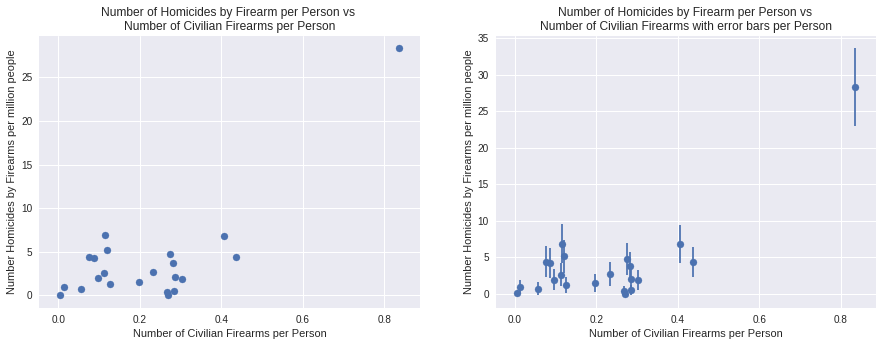

In [19]:
# Set up plots with grid
fig = pl.figure(figsize=(15,5)) 
grid = pl.GridSpec(1,2)
ax0 = pl.subplot(grid[0,0])
ax1 = pl.subplot(grid[0,1])

# Plot absolute values
scatter = ax0.scatter(df["AvgGunsPerPerson"], df['AvgDeathsPerPerson']*1e6)

# Format figure
ax0.set_xlabel("Number of Civilian Firearms per Person")
ax0.set_ylabel("Number Homicides by Firearms per million people")
ax0.set_ylim()
ax0.set_title("Number of Homicides by Firearm per Person vs \n"
              "Number of Civilian Firearms per Person")

# Plot absolute values 
scatter = ax1.scatter(df["AvgGunsPerPerson"], df['AvgDeathsPerPerson']*1e6)
ax1.errorbar(df["AvgGunsPerPerson"], df['AvgDeathsPerPerson']*1e6, 
             yerr = np.sqrt(df['AvgDeathsPerPerson']*1e6 * 1.0), fmt = '.')
# Format figure
ax1.set_xlabel("Number of Civilian Firearms per Person")
ax1.set_ylabel("Number Homicides by Firearms per million people")
ax1.set_ylim()
ax1.set_xlim()
ax1.set_title("Number of Homicides by Firearm per Person vs \n"
              "Number of Civilian Firearms with error bars per Person")

### Figure 6: Number of Homicides per person vs Number of Civilian Firearms per person
#### The USA is still a clear outlier. There does appear to be some form of a direct relationship between the number of guns and homicides with a few outliers with either no deaths or higher numbers of deaths

## plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


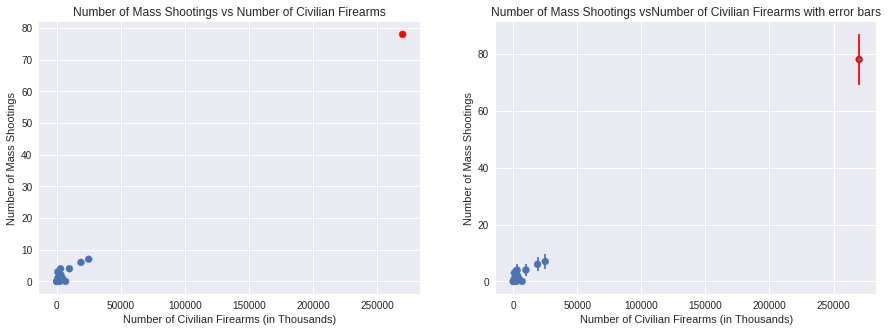

In [20]:
# Set up plots with grid
fig = pl.figure(figsize=(15,5)) 
grid = pl.GridSpec(1,2)
ax0 = pl.subplot(grid[0,0])
ax1 = pl.subplot(grid[0,1])

#Colour if US
# Kent Pan helped with this code
kcolors = np.where(df['Country']=="United States","r","C0")

# Plot absolute values
scatter = ax0.scatter(df["Average total all civilian firearms"]/1e3, 
                      df['Number of mass shootings'],
                      c=kcolors)

# Format figure
ax0.set_xlabel("Number of Civilian Firearms (in Thousands)")
ax0.set_ylabel("Number of Mass Shootings")
ax0.set_ylim()
ax0.set_title("Number of Mass Shootings vs Number of Civilian Firearms")

# Plot absolute values 
scatter = ax1.scatter(df["Average total all civilian firearms"]/1e3, 
                      df['Number of mass shootings'], c=kcolors)
ax1.errorbar(df["Average total all civilian firearms"]/1e3, 
             df['Number of mass shootings'], 
             yerr = np.sqrt(df['Number of mass shootings'] * 1.0), fmt = '.', 
             ecolor=kcolors)
# Format figure
ax1.set_xlabel("Number of Civilian Firearms (in Thousands)")
ax1.set_ylabel("Number of Mass Shootings")
ax1.set_ylim()
ax1.set_xlim()
ax1.set_title("Number of Mass Shootings vs" 
              "Number of Civilian Firearms with error bars")

### Figure 7: Number of Mass Shootings vs Number of Civilian Firearms
#### The relationship looks linear, including the US although it has far higher levels of both mass shootings and civilian guns

# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




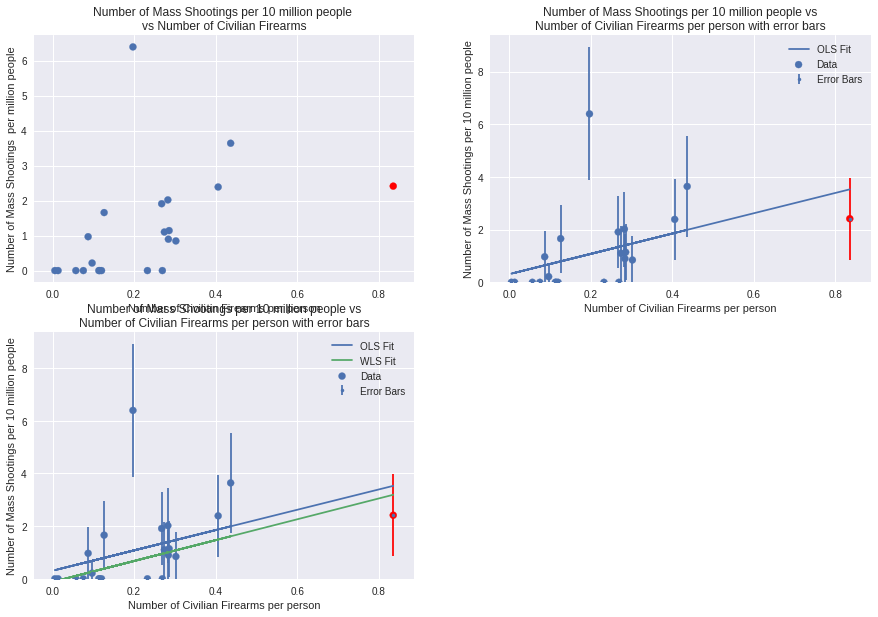

In [74]:
import seaborn  as sns

# Set up plots with grid
fig = pl.figure(figsize=(15,10)) 
grid = pl.GridSpec(2,2)
ax0 = pl.subplot(grid[0,0])
ax1 = pl.subplot(grid[0,1])
ax2 = pl.subplot(grid[1,0])

#Colour if US
# Kent Pan helped with this code
kcolors = np.where(df['Country']=="United States","r","C0")

# Plot absolute values
scatter = ax0.scatter(df["AvgGunsPerPerson"], 
                      df['mass shootings per person']*1e7,
                      c=kcolors)

# Format figure
ax0.set_xlabel("Number of Civilian Firearms per person")
ax0.set_ylabel("Number of Mass Shootings  per million people")
ax0.set_ylim()
ax0.set_title("Number of Mass Shootings per 10 million people \n"
              "vs Number of Civilian Firearms")

# Plot absolute values 
scatter = ax1.scatter(df["AvgGunsPerPerson"], 
                      df['mass shootings per person']*1e7, c=kcolors, 
                      label="Data")
ax1.errorbar(df["AvgGunsPerPerson"], 
             df['mass shootings per person']*1e7, 
             yerr = np.sqrt(df['mass shootings per person']*1e7 * 1.0), fmt = '.', 
             ecolor=kcolors,label="Error Bars")
# Set up OLS linear model and plot
lm = sm.OLS(endog=(df['mass shootings per person']*1e7), exog=sm.add_constant(df["AvgGunsPerPerson"])).fit()
ax1.plot(df["AvgGunsPerPerson"], lm.fittedvalues, "-", label="OLS Fit")

# Format figure
ax1.set_xlabel("Number of Civilian Firearms per person")
ax1.set_ylabel("Number of Mass Shootings per 10 million people")
ax1.set_ylim(0)
ax1.set_xlim()
ax1.set_title("Number of Mass Shootings per 10 million people vs\n" 
              "Number of Civilian Firearms per person with error bars")
ax1.legend()



# Plot absolute values 
scatter = ax2.scatter(df["AvgGunsPerPerson"], 
                      df['mass shootings per person']*1e7, c=kcolors, 
                      label="Data")
ax2.errorbar(df["AvgGunsPerPerson"], 
             df['mass shootings per person']*1e7, 
             yerr = np.sqrt(df['mass shootings per person']*1e7 * 1.0), fmt = '.', 
             ecolor=kcolors,label="Error Bars")
# Set up OLS linear model and plot
lm = sm.OLS(endog=(df['mass shootings per person']*1e7), 
            exog=sm.add_constant(df["AvgGunsPerPerson"])).fit()
ax2.plot(df["AvgGunsPerPerson"], lm.fittedvalues, "-", label="OLS Fit")

#Define error
yerr = np.sqrt(df['mass shootings per person']*1e7) * 1.0
yerr = np.where(yerr==0,np.min(yerr.values[nonzero(yerr.values)]),yerr)
# Turn y error zero values into minimum nonzero values


# Set up WLS linear model and plot
weightm = sm.WLS(endog=(df['mass shootings per person']*1e7), 
                 exog=sm.add_constant(df["AvgGunsPerPerson"]),
                 weights=1.0/yerr).fit()
ax2.plot(df["AvgGunsPerPerson"], weightm.fittedvalues, "-", label="WLS Fit", )


# Format figure
ax2.set_xlabel("Number of Civilian Firearms per person")
ax2.set_ylabel("Number of Mass Shootings per 10 million people")
ax2.set_ylim(0)
ax2.set_xlim()
ax2.set_title("Number of Mass Shootings per 10 million people vs\n" 
              "Number of Civilian Firearms per person with error bars")
ax2.legend()

## Use the stsatsmodels.gaphics package to plot the influence plot. 
Read the package documentation to learn how to read this plot and extract the countries with the highest influence

This is the topic of this week's assigned reading, so make sure you do the reading before you do this step. It will help you interpret the plot.

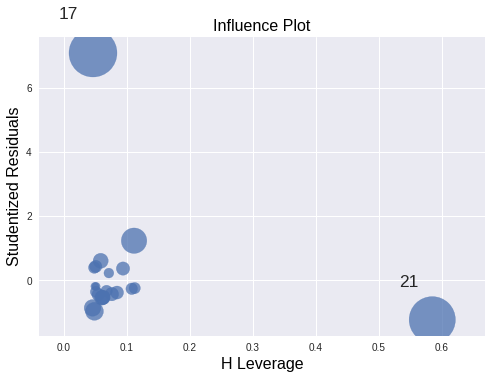

In [77]:
sm.graphics.influence_plot(lm, alpha  = 0.05, criterion="cooks");

## Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences

## Discuss your findings

## Extra credit: calculate the confidence interval by hand and also plot them 
you can use pylab.fill_between(x, yfit - ci, yfit + ci, alpha=0.5)

**Confidence intervals: **
there are three type of intervals in a linear regression, plot any one of them all three if you want - how do they compare to the seaborn plot?:

1) Confidence intervals for the parameters slope and intercept

2) Confidence interval for the average y value

3) Prediction interval for a single y value

1) __confidence interval of the  model parameters slope and intercept:__
define sigma as the sum of the residuals over the square root of number n of observations. 

sigma: σ̂ =sqrt(Sum((Yoberved_i−Ypredicted_i)^2)/n)

where the sum is over all observations

Define t_alpha/2,n-2 the t statistics at (1-alpha/2) for a t distribution with n-2 degrees of freedom (you can calculate it with scipy
tp = sp.stats.t.ppf(0.975, n-2)



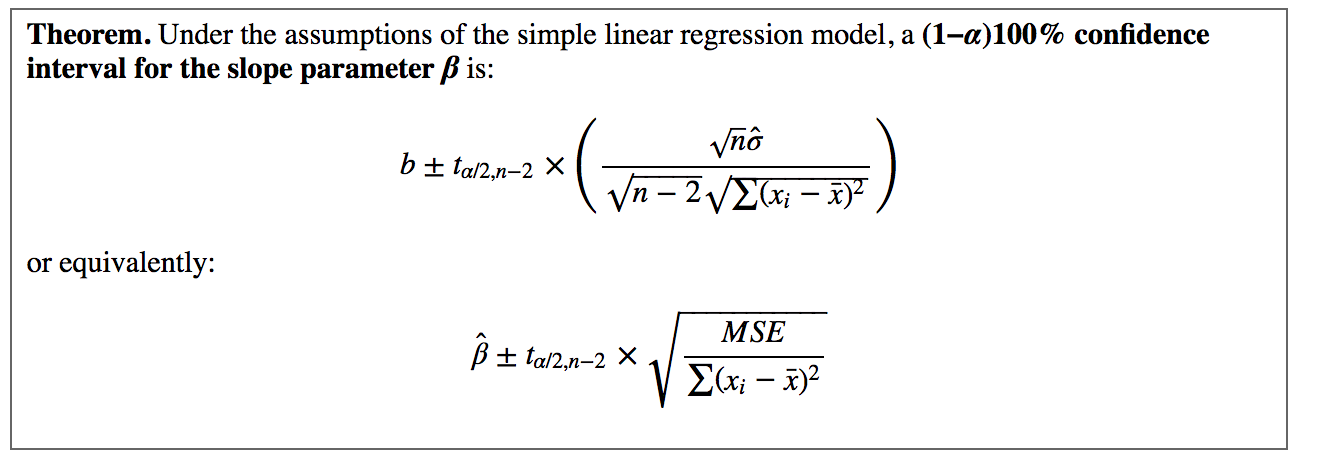

In [29]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression.png")

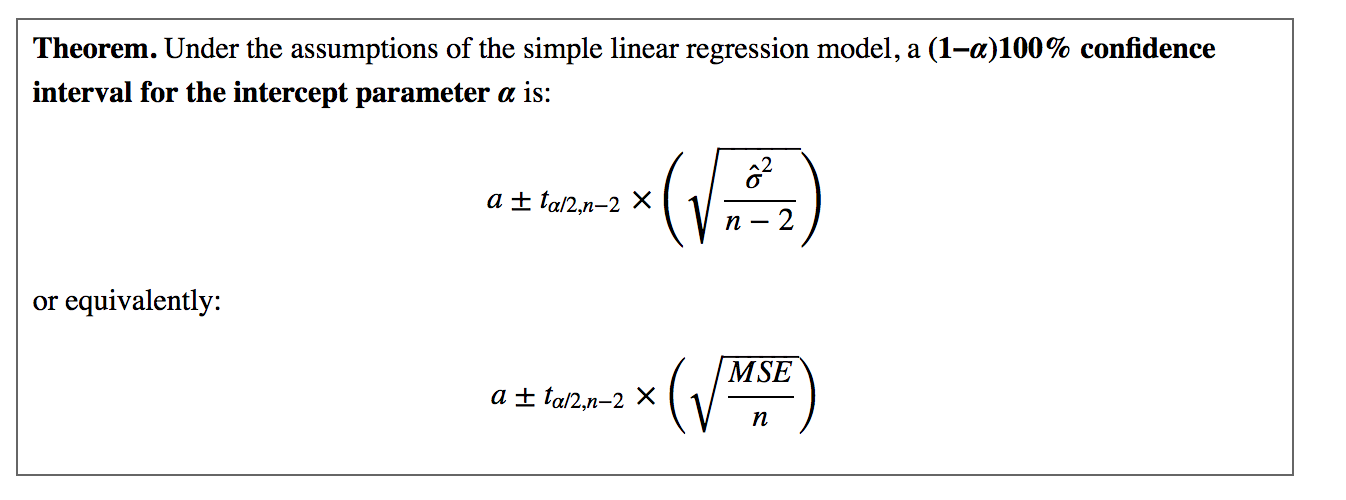

In [30]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression2.png")

[proof](https://onlinecourses.science.psu.edu/stat414/node/280)

2) **A confidence interval for E(y | x) , the expected (average) value of y for a given x_**

define s: residual standard error sy = sqrt(Sum((y_observed-y_predicted)^2)/(n-2))

(note: n-2 is the degrees of freedom of the problem: observations - number of parameters - 1)

the confidence interval for a given y(x*) is: 

y_predicted(x*) +/- t_(alpha/2)(n-2) * sy * sqrt( 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

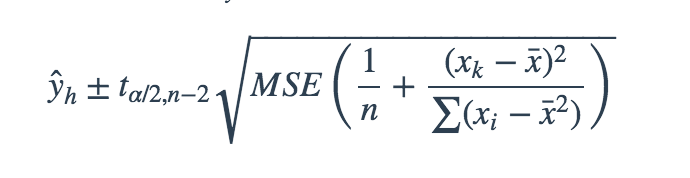

In [33]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciY.png")

3) **Confidence intervals for average y (predicted) values**

y_predicted(x*) +/- t_(n-2) * sy * sqrt( 1 + 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

very similar, but note the +1 in the square root

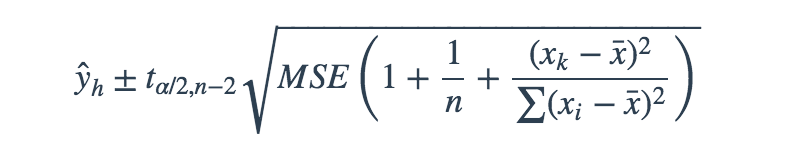

In [32]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciYaverage.png")

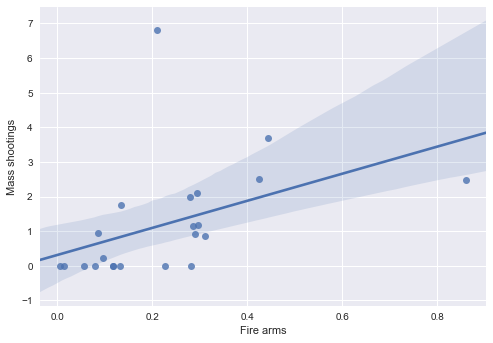

In [66]:
pl.figure()
import seaborn  as sns
sns.regplot(x="x", y="y", data=df_);

pl.ylabel("Mass shootings")
pl.xlabel("Fire arms");